In [20]:
from ctypes import util
from random import sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal as sig
import wave
from scipy.io import wavfile
import utils

sns.set()

### Channel Estimation

<class 'numpy.ndarray'>
(441000,)


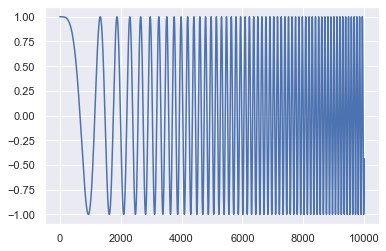

In [127]:
chirp = wavfile.read('data/chirp.wav')
chirp_data = chirp[1]
print(type(chirp_data))
print(np.shape(chirp_data))

plt.plot(chirp_data[:10000])

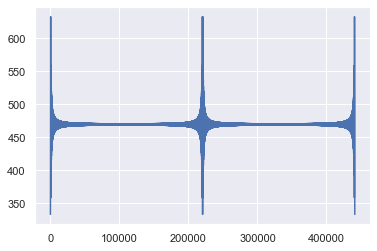

In [128]:
chirp_f = np.fft.fft(chirp_data)
plt.plot(abs(chirp_f))

<class 'numpy.ndarray'>
(30,)


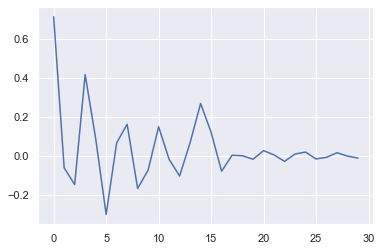

In [129]:
channel = np.ndarray.flatten(pd.read_csv('data/channel.csv', header=None).values)
print(type(channel))
print(np.shape(channel))

plt.plot(channel)

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


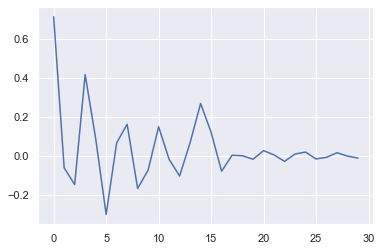

In [130]:
plt.plot((np.fft.ifft(np.fft.fft(channel, len(channel)), len(channel))))

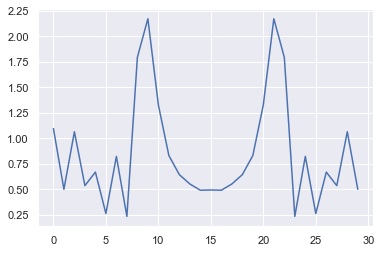

In [131]:
channel_f = np.fft.fft(channel)
plt.plot(abs(channel_f))

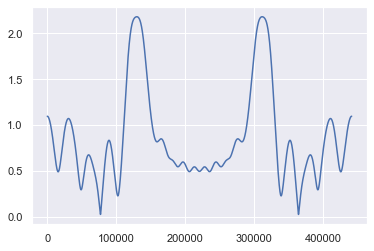

In [132]:
channel_f = sig.resample(channel_f, len(chirp_data))
plt.plot(abs(channel_f))

(441029,)


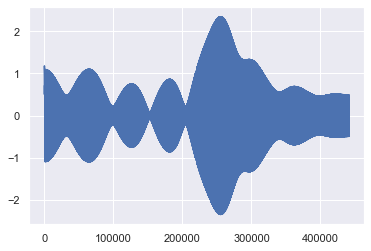

In [133]:
chirp_out = np.convolve(chirp_data, channel)
print(np.shape(chirp_out))

plt.plot(chirp_out)

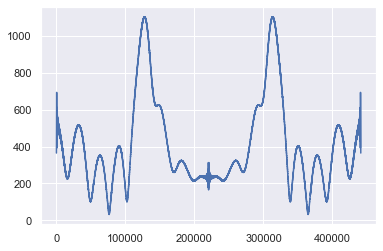

In [136]:
chirp_out_f = np.fft.fft(chirp_out, len(chirp_data))

plt.plot(abs(chirp_out_f))

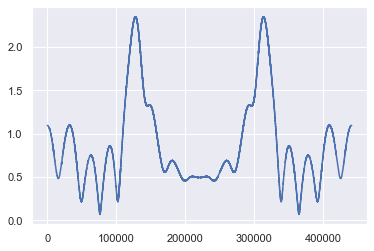

In [137]:
channel_r = chirp_out_f/chirp_f

plt.plot(abs(channel_r))

In [138]:
for i in range(1, len(channel_r)//2):
    channel_r[len(channel_r) - i] = np.conj(channel_r[i])

channel_r = sig.resample(channel_r, len(channel))
plt.plot(abs(channel_r))

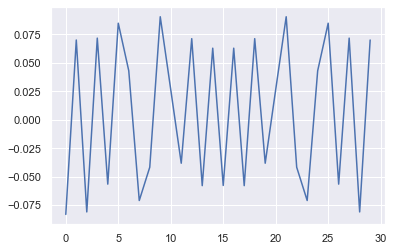

In [139]:
plt.plot(abs(np.fft.fft(channel)) - abs(channel_r))

### Channel Synchronisation

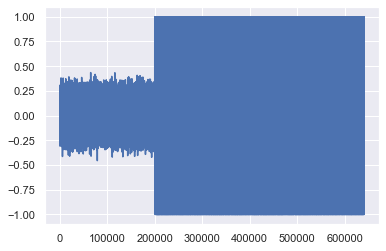

In [140]:
# We add some gaussian noised padding to our signal to simulate that we are sending at some random time. 

noise = 0.1*np.random.randn(200000)
chirp_data = np.concatenate((noise, chirp_data))
# chirp_data += 0.01*np.random.randn(len(chirp_data))

plt.plot(chirp_data)

(641000,)


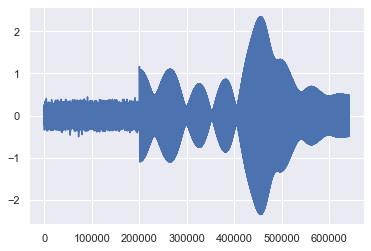

In [141]:
chirp_out = np.convolve(chirp_data, channel, mode='same')
print(np.shape(chirp_out))

plt.plot(chirp_out)

In [125]:
match = np.convolve(chirp_data, chirp_out[::-1])

plt.plot(match)

In [126]:
print(f"Chirp started at: {np.argmax(match) - 441000}")

Chirp started at: 200013
